## Decision Tree

#### Problem Statement: 1- Company_data
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [39]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [41]:
data['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [42]:
data1= pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'])
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [43]:
label_encoder = preprocessing.LabelEncoder()
data1['Sales']= label_encoder.fit_transform(data1['Sales'])
# encoding the Sales data with respect to entire dataset

In [44]:
X = data1.iloc[:, 1:14]
y = data1['Sales']


In [45]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No
0,138,73,11,276,120,42,17,1,0,0,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0
397,162,26,12,368,159,40,18,0,0,1,0,1,0
398,100,79,7,284,95,50,12,1,0,0,0,1,0


In [46]:
y

0      255
1      297
2      267
3      158
4       37
      ... 
395    320
396    114
397    159
398    106
399    262
Name: Sales, Length: 400, dtype: int64

In [47]:
data1['Sales'].unique()

array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
       227, 328, 190, 252, 126,  88, 321, 210, 286, 177,  47, 239, 191,
       165, 302,   9, 218, 304, 130, 188,  82,  58,  49, 228, 204,  93,
       253, 162, 318,  60,  35,  79,  70,  52,  90,   1,  24, 232, 233,
       132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229,
       245, 298, 127,  64,  48, 205, 257, 172,  28, 125,  74, 274, 316,
       111, 128, 161,   3, 237,  31, 282, 168, 300, 280, 289, 174, 105,
       143, 178, 163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137,
       153, 235, 120,   0, 167,  94, 279, 287, 182,  62, 160,  56,  81,
       263, 268, 216, 193, 313, 225, 326, 152,  40,  34,  11,  2

In [62]:
data1['Sales'] = l
l =[]
for i in data1['Sales']:
    if i>243:
        l.append(1)
    else :
        l.append(0)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,0,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,0,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,0,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,0,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,0,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [ ]:
data1['Sales'].

In [48]:
data1.Sales.value_counts()

183    4
223    3
243    3
34     3
117    3
      ..
28     1
172    1
257    1
205    1
262    1
Name: Sales, Length: 336, dtype: int64

In [51]:
data1.Sales.max()
data1.Sales.min()

0

In [52]:
data1.Sales.describe()

count    400.000000
mean     165.225000
std       94.449463
min        0.000000
25%       84.750000
50%      163.000000
75%      243.000000
max      335.000000
Name: Sales, dtype: float64

In [49]:
data1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [13]:
colnames = list[data1.columns]
colnames

list[Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')]

### Splitting the data into training and testing to get the right results

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No
75,88,111,23,480,92,36,16,1,0,0,1,0,0
118,112,88,2,243,99,62,11,0,0,1,0,1,0
377,132,61,0,263,125,41,12,0,0,1,1,0,1
62,139,45,0,146,133,77,17,1,0,0,0,1,0
165,147,58,7,100,191,27,15,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,150,84,9,432,134,64,15,0,0,1,0,1,1
309,131,111,13,33,80,68,18,1,0,0,0,1,0
349,134,27,18,467,96,49,14,0,0,1,1,0,0
169,104,41,15,492,77,73,18,0,1,0,0,1,0


In [16]:
y_train

75     210
118    169
377    139
62       6
165      2
      ... 
86     218
309    295
349    243
169    300
331    270
Name: Sales, Length: 320, dtype: int64

### Building a decision tree to find the impact of features in finding the sales is high or low using Entropy Criteria

In [19]:
model = DecisionTreeClassifier (criterion = 'entropy', max_depth =4)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

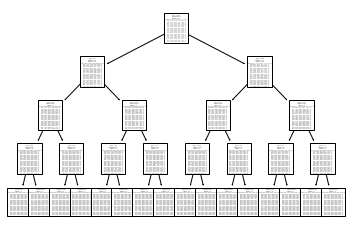

In [20]:
tree.plot_tree(model);

In [21]:
y_train.value_counts()

183    4
223    3
142    3
117    3
103    3
      ..
108    1
327    1
217    1
121    1
270    1
Name: Sales, Length: 280, dtype: int64

In [22]:
y_train.sort_values()

174      0
106      1
165      2
143      3
57       4
      ... 
352    329
30     330
18     331
25     333
376    335
Name: Sales, Length: 320, dtype: int64

IndexError: list index out of range

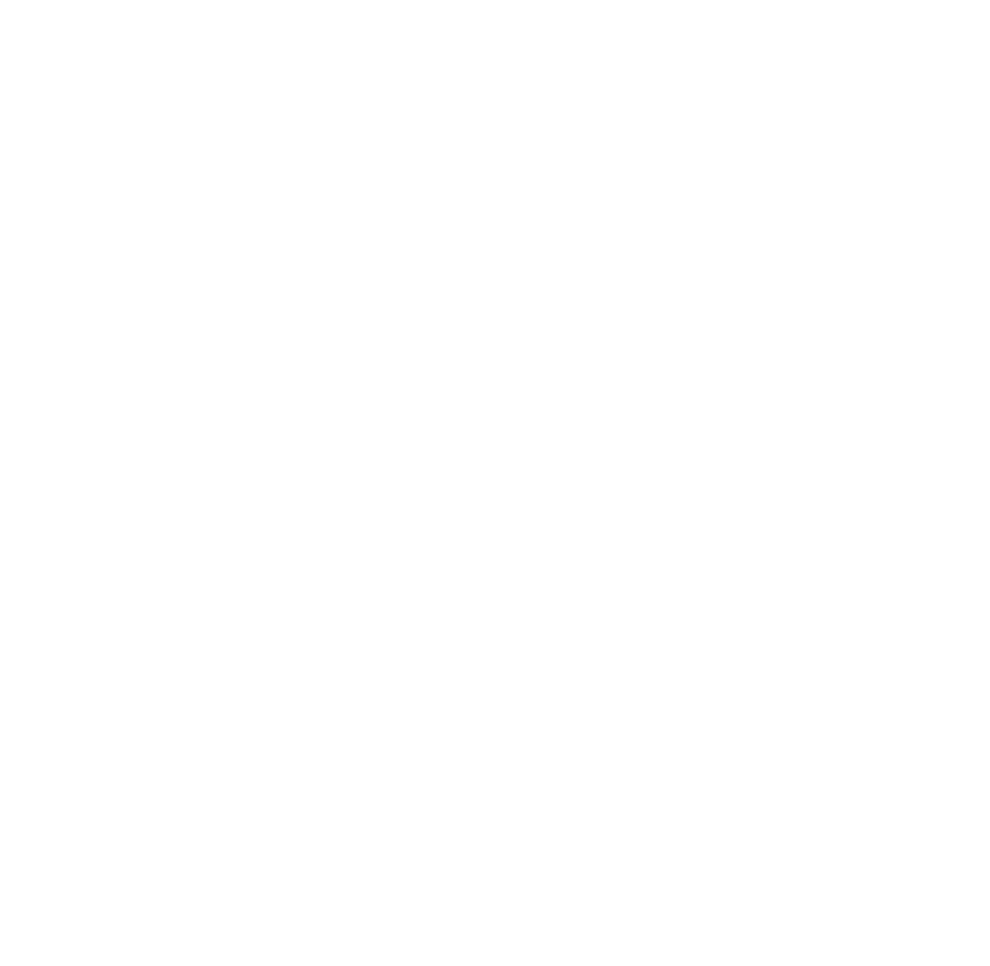

In [26]:
fn=[X]
cn=[y]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
l = data1['Sales']
l =[]
for i in data1['Sales']:
    if i>10:
        l.append('Good')
    else :
        l.append('Low')
l

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
array = data1.values
X= array[:, 1:14]
y = array[:, 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
mode = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
fn=[x]
cn=[y]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()
#predicting on test data and getting the count in each category

In [ ]:
y_test

In [ ]:
preds

In [ ]:
pd.crosstab(y_test, preds) 
# getting the 2 way table to understand the correct and wrong predictions

In [ ]:
np.mean(preds==y_test)
#getting the accuracy

## Above shows a prediction accuracy of 80% which is ok

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier (criterion='gini', max_depth=4)

In [ ]:
model_gini.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)
np.mean(preds==y_test)
# using Gini Criteria Method

### Validating using the Regression model to assess the better one

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
data_n

In [ ]:
array = data_n.values
X= array[:, 1:14]
y = array[:, 14]

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### It can be concluded that the model will have 80% accuracy using the gini or entropy cirterion

## Problem 2: Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
chk = pd.read_csv('Fraud_check.csv')
chk

In [ ]:
chk1= pd.get_dummies(chk, columns=['Undergrad', 'Marital.Status', 'Urban'])
chk1

In [ ]:
chk1['Taxin'] = l
l =[]
for i in chk1['Taxin']:
    if i>30000:
        l.append('Good')
    else :
        l.append('Low')
chk1

In [ ]:
chk1.info